## Comparing the clean and incremental build time of a system on its different configurations

In [1]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03I/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,8.58,2736120,9.29,8.66,8.40
1,00002,8.20,2468160,9.25,8.31,8.00
2,00003,11.61,3202648,12.70,11.77,11.41
3,00004,11.32,3344192,12.35,11.44,11.06
4,00005,11.73,3456200,13.19,12.00,11.65
5,00006,9.87,3015768,10.90,10.07,9.77
6,00007,9.68,2857160,10.59,9.81,9.51
7,00008,9.88,2902288,10.78,10.08,9.74
8,00009,11.50,3218472,12.50,11.73,11.38
9,00010,10.70,3023648,11.88,10.91,10.56


In [2]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
16,00017,7.67,7.47,2.54
1,00002,8.20,8.00,2.44
3,00004,11.32,11.06,2.22
0,00001,8.58,8.40,2.07
10,00011,9.83,9.63,2.03
18,00019,11.85,11.62,1.91
13,00014,8.86,8.69,1.88
2,00003,11.61,11.41,1.73
6,00007,9.68,9.51,1.72
15,00016,9.78,9.61,1.72


In [3]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
16,00017,7.67,7.47,2.54
1,00002,8.20,8.00,2.44
3,00004,11.32,11.06,2.22
0,00001,8.58,8.40,2.07
10,00011,9.83,9.63,2.03
14,00015,10.19,10.06,1.33
8,00009,11.50,11.38,1.11
11,00012,9.01,8.91,1.10
5,00006,9.87,9.77,1.02
4,00005,11.73,11.65,0.69


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

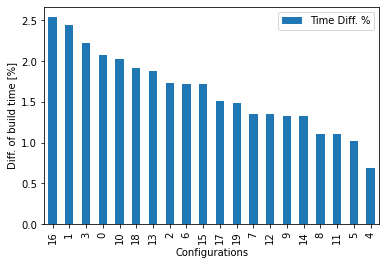

In [4]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df4[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot